# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
import time 

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Cities Data Output File (CSV)
output_data_file = "/Users/ashleypatricia/Documents/GitHub/python-api-challenge/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [4]:
api_url = "https://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

query_url = f"{api_url}units={units}&appid={weather_api_key}"
#print(query_url)

# Create empty list 
final_data = []
pro_records = 1
sets = 1

print("Beginning Data Retrieval")
print("-----------------------------")

for index, city in enumerate(cities): 
    # Creating sets of 50 
    if index >= 50 and index % 50 == 0:
        sets += 1
        pro_records = 1
        time.sleep(10)

    # Create url for each city
    city_url = query_url + "&q=" + city.replace(" ","+")
    print(f"Processing Record {pro_records} of Set {sets} | {city}")
    pro_records += 1

    try: 
        response = requests.get(city_url).json()    
        lat = response["coord"]["lat"]
        lng = response["coord"]["lon"]
        max_temp = response["main"]["temp_max"]
        humidity = response["main"]["humidity"]
        cloudiness = response["clouds"]["all"]
        windspeed = response["wind"]["speed"]
        country = response["sys"]["country"]
        pull_date = response["dt"]
        final_data.append({"City": city, 
            "Lat": lat, 
            "Lng": lng, 
            "Max Temp": max_temp, 
            "Humidity": humidity, 
            "Cloudiness": cloudiness, 
            "Wind Speed": windspeed, 
            "Country": country, 
            "Date": pull_date})

    except (KeyError, IndexError):
        print("City " + "\033[1m" + "not" + "\033[0m" + " found. Skipping...")
        pass

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")
    

not* found. Skipping...
Processing Record 8 of Set 4 | boa vista
Processing Record 9 of Set 4 | marsh harbour
Processing Record 10 of Set 4 | shaunavon
Processing Record 11 of Set 4 | wanning
Processing Record 12 of Set 4 | kavieng
Processing Record 13 of Set 4 | krasnyy chikoy
Processing Record 14 of Set 4 | calabozo
Processing Record 15 of Set 4 | talnakh
Processing Record 16 of Set 4 | ciudad bolivar
Processing Record 17 of Set 4 | erenhot
Processing Record 18 of Set 4 | barbar
City *not* found. Skipping...
Processing Record 19 of Set 4 | tuktoyaktuk
Processing Record 20 of Set 4 | urucui
Processing Record 21 of Set 4 | plerin
Processing Record 22 of Set 4 | new norfolk
Processing Record 23 of Set 4 | arman
Processing Record 24 of Set 4 | palu
Processing Record 25 of Set 4 | grand river south east
City *not* found. Skipping...
Processing Record 26 of Set 4 | sao geraldo do araguaia
Processing Record 27 of Set 4 | cascas
Processing Record 28 of Set 4 | portland
Processing Record 29 o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# See new dataframe
city_df = pd.DataFrame(final_data)
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vagur,61.4732,-6.8119,43.21,71,100,3.87,FO,1619138020
1,chokurdakh,70.6333,147.9167,4.89,91,90,5.70,RU,1619138020
2,bluff,-46.6000,168.3333,57.00,74,100,8.01,NZ,1619137761
3,kalabo,-14.9700,22.6814,62.35,62,5,5.19,ZM,1619138021
4,bethel,41.3712,-73.4140,39.99,54,55,5.01,US,1619137915


In [7]:
# Export to csv
city_df.to_csv("/Users/ashleypatricia/Documents/GitHub/python-api-challenge/WeatherPy/city data.csv", index = False)

In [8]:
# Display the dataframe
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,5.690000e+02
mean,19.949346,16.232394,59.753691,69.441125,54.022847,7.988699,1.619138e+09
std,32.984868,89.712837,19.460358,21.817758,40.664132,5.979489,1.592816e+02
min,-54.800000,-175.200000,4.890000,12.000000,0.000000,0.160000,1.619138e+09
25%,-6.400600,-65.019200,44.490000,55.000000,8.000000,3.510000,1.619138e+09
50%,21.461200,18.423200,62.600000,74.000000,68.000000,6.460000,1.619138e+09
75%,47.466700,96.166700,76.860000,87.000000,99.000000,10.850000,1.619138e+09
max,78.218600,179.316700,91.990000,100.000000,100.000000,40.310000,1.619138e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#  Get the indices of cities that have humidity over 100%.
high_hum = city_df[city_df["Humidity"] > 100]
# Confirm that none of the cities have a humidity above 100%
high_hum

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

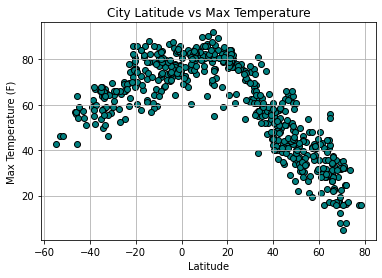

In [10]:
plt.scatter(city_df["Lat"], city_df["Max Temp"], marker="o", facecolors="teal", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Max Temperature")
plt.grid(True)
#plt.savefig("plot1.png")
plt.show()

## Latitude vs. Humidity Plot

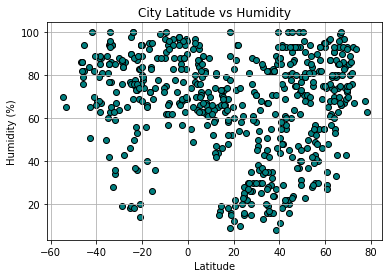

In [24]:
plt.scatter(city_df["Lat"], city_df["Humidity"], marker="o", facecolors="teal", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity")
plt.grid(True)
#plt.savefig("plot1.png")
plt.show()

## Latitude vs. Cloudiness Plot

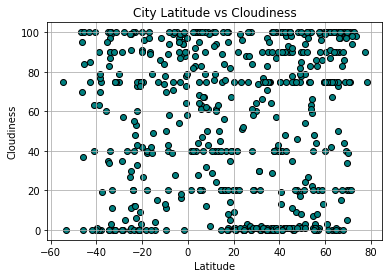

In [25]:
plt.scatter(city_df["Lat"], city_df["Cloudiness"], marker="o", facecolors="teal", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs Cloudiness")
plt.grid(True)
#plt.savefig("plot1.png")
plt.show()

## Latitude vs. Wind Speed Plot

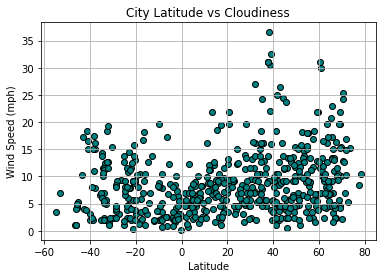

In [26]:
plt.scatter(city_df["Lat"], city_df["Wind Speed"], marker="o", facecolors="teal", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Cloudiness")
plt.grid(True)
#plt.savefig("plot1.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.9061502449608686


<function matplotlib.pyplot.show(close=None, block=None)>

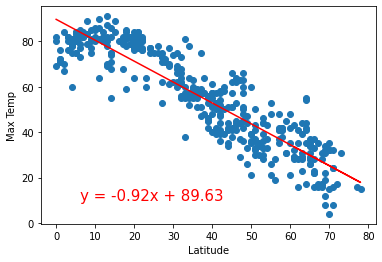

In [126]:
#### Need to tell code to include anything that has a positive latitude

# Create x and y empty lists to hold the data from the for loop
x_values = []
y_values = []

# Create for loop to get only cities in the Northern Hemisphere
for i in city_df.index:
    # Only positive values because of the Northern Hemisphere
    if city_df.iloc[i, 1] >= 0:
        # Add in the longitude values to list
        x_values.append(int(city_df.iloc[i, 1]))
        # Add in the max temperature to the list
        y_values.append(int(city_df.iloc[i, 3]))

# Convert the lists into arrays         
x_values = np.array(x_values)
y_values = np.array(y_values)
# Linear regression math
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Variable for regress values 
regress_values = x_values * slope + intercept
# Get y=mx+b equation 
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
# Print the r value
print(f"The r-value is: {rvalue}")
# Tell python to create scatterplot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7170950420479517


<function matplotlib.pyplot.show(close=None, block=None)>

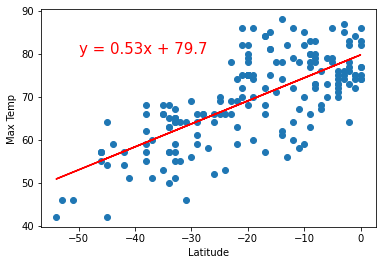

In [141]:
#### Need to tell code to include anything that has a negative latitude

# Create x and y empty lists to hold the data from the for loop
x_values2 = []
y_values2 = []

# Create for loop to get only cities in the Southern Hemisphere
for i in city_df.index:
    # Only negative values because of the Southern Hemisphere
    if city_df.iloc[i, 1] < 0:
        # Add in the longitude values to list
        x_values2.append(int(city_df.iloc[i, 1]))
        # Add in the max temperature to the list
        y_values2.append(int(city_df.iloc[i, 3]))

# Convert the lists into arrays         
x_values2 = np.array(x_values2)
y_values2 = np.array(y_values2)
# Linear regression math
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values2, y_values2)
# Variable for regress values 
regress_values2 = x_values2 * slope + intercept
# Get y=mx+b equation 
line_eq2 = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
# Print the r value
print(f"The r-value is: {rvalue}")
# Tell python to create scatterplot

plt.scatter(x_values2, y_values2)
plt.plot(x_values2, regress_values2, "r-") 
plt.annotate(line_eq2,(-50,80),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.10070885900344347


<function matplotlib.pyplot.show(close=None, block=None)>

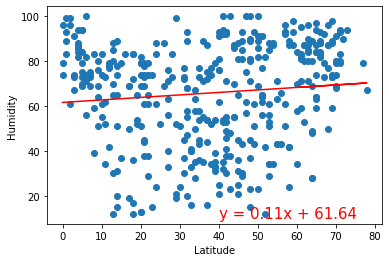

In [143]:
#### Need to tell code to include anything that has a positive latitude

# Create x and y empty lists to hold the data from the for loop
x_values3 = []
y_values3 = []

# Create for loop to get only cities in the Northern Hemisphere
for i in city_df.index:
    # Only positive values because of the Northern Hemisphere
    if city_df.iloc[i, 1] >= 0:
        # Add in the longitude values to list
        x_values3.append(int(city_df.iloc[i, 1]))
        # Add in the max temperature to the list
        y_values3.append(int(city_df.iloc[i, 4]))

# Convert the lists into arrays         
x_values3 = np.array(x_values3)
y_values3 = np.array(y_values3)
# Linear regression math
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values3, y_values3)
# Variable for regress values 
regress_values3 = x_values3 * slope + intercept
# Get y=mx+b equation 
line_eq3 = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
# Print the r value
print(f"The r-value is: {rvalue}")
# Tell python to create scatterplot
plt.scatter(x_values3, y_values3)
plt.plot(x_values3, regress_values3, "r-")
plt.annotate(line_eq3,(40,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0.25094979869504447
0.19711525854244744
The r-value is: 0.19711525854244744


<function matplotlib.pyplot.show(close=None, block=None)>

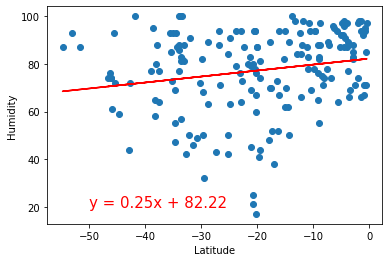

In [154]:
#### Need to tell code to include anything that has a negative latitude

# Create x and y empty lists to hold the data from the for loop
x_values4 = []
y_values4 = []

# Create for loop to get only cities in the Southern Hemisphere
for i in city_df.index:
    # Only negative values because of the Southern Hemisphere
    if city_df.iloc[i, 1] < 0:
        # Add in the longitude values to list
        x_values4.append(city_df.iloc[i, 1])
        # Add in the humidity to the list
        y_values4.append(city_df.iloc[i, 4])

# Convert the lists into arrays         
x_values4 = np.array(x_values4)
y_values4 = np.array(y_values4)
# Linear regression math
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values4, y_values4)
print(slope)
print(rvalue)

# Variable for regress values 
regress_values4 = x_values4 * slope + intercept
# Get y=mx+b equation 
line_eq4 = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
# Print the r value
print(f"The r-value is: {rvalue}")
# Tell python to create scatterplot

plt.scatter(x_values4, y_values4)
plt.plot(x_values4, regress_values4, "r-") 
plt.annotate(line_eq4,(-50,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.11854460244020217


<function matplotlib.pyplot.show(close=None, block=None)>

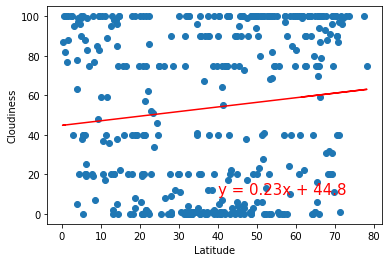

In [157]:
#### Need to tell code to include anything that has a positive latitude

# Create x and y empty lists to hold the data from the for loop
x_values5 = []
y_values5 = []

# Create for loop to get only cities in the Northern Hemisphere
for i in city_df.index:
    # Only positive values because of the Northern Hemisphere
    if city_df.iloc[i, 1] >= 0:
        # Add in the longitude values to list
        x_values5.append(city_df.iloc[i, 1])
        # Add in the max temperature to the list
        y_values5.append(city_df.iloc[i, 5])

# Convert the lists into arrays         
x_values5 = np.array(x_values5)
y_values5 = np.array(y_values5)
# Linear regression math
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values5, y_values5)
# Variable for regress values 
regress_values5 = x_values5 * slope + intercept
# Get y=mx+b equation 
line_eq5 = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
# Print the r value
print(f"The r-value is: {rvalue}")
# Tell python to create scatterplot
plt.scatter(x_values5, y_values5)
plt.plot(x_values5, regress_values5, "r-")
plt.annotate(line_eq5,(40,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.08473404916496043


<function matplotlib.pyplot.show(close=None, block=None)>

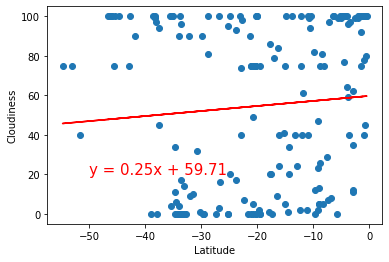

In [163]:
#### Need to tell code to include anything that has a negative latitude

# Create x and y empty lists to hold the data from the for loop
x_values6 = []
y_values6 = []

# Create for loop to get only cities in the Southern Hemisphere
for i in city_df.index:
    # Only negative values because of the Southern Hemisphere
    if city_df.iloc[i, 1] < 0:
        # Add in the longitude values to list
        x_values6.append(city_df.iloc[i, 1])
        # Add in the humidity to the list
        y_values6.append(city_df.iloc[i, 5])

# Convert the lists into arrays         
x_values6 = np.array(x_values6)
y_values6 = np.array(y_values6)
# Linear regression math
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values6, y_values6)
# Variable for regress values 
regress_values6 = x_values6 * slope + intercept
# Get y=mx+b equation 
line_eq6 = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
# Print the r value
print(f"The r-value is: {rvalue}")
# Tell python to create scatterplot
plt.scatter(x_values6, y_values6)
plt.plot(x_values6, regress_values6, "r-") 
plt.annotate(line_eq6,(-50,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.10908856346636114


<function matplotlib.pyplot.show(close=None, block=None)>

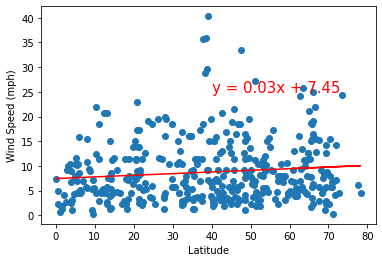

In [165]:
#### Need to tell code to include anything that has a positive latitude

# Create x and y empty lists to hold the data from the for loop
x_values7 = []
y_values7 = []

# Create for loop to get only cities in the Northern Hemisphere
for i in city_df.index:
    # Only positive values because of the Northern Hemisphere
    if city_df.iloc[i, 1] >= 0:
        # Add in the longitude values to list
        x_values7.append(city_df.iloc[i, 1])
        # Add in the max temperature to the list
        y_values7.append(city_df.iloc[i, 6])

# Convert the lists into arrays         
x_values7 = np.array(x_values7)
y_values7 = np.array(y_values7)
# Linear regression math
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values7, y_values7)
# Variable for regress values 
regress_values7 = x_values7 * slope + intercept
# Get y=mx+b equation 
line_eq7 = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
# Print the r value
print(f"The r-value is: {rvalue}")
# Tell python to create scatterplot
plt.scatter(x_values7, y_values7)
plt.plot(x_values7, regress_values7, "r-")
plt.annotate(line_eq7,(40,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.22730337387091615


<function matplotlib.pyplot.show(close=None, block=None)>

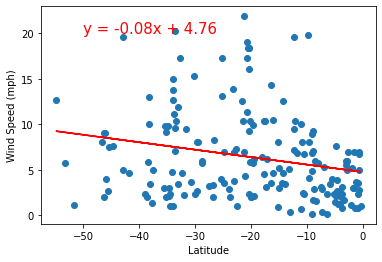

In [166]:
#### Need to tell code to include anything that has a negative latitude

# Create x and y empty lists to hold the data from the for loop
x_values8 = []
y_values8 = []

# Create for loop to get only cities in the Southern Hemisphere
for i in city_df.index:
    # Only negative values because of the Southern Hemisphere
    if city_df.iloc[i, 1] < 0:
        # Add in the longitude values to list
        x_values8.append(city_df.iloc[i, 1])
        # Add in the humidity to the list
        y_values8.append(city_df.iloc[i, 6])

# Convert the lists into arrays         
x_values8 = np.array(x_values8)
y_values8 = np.array(y_values8)
# Linear regression math
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values8, y_values8)
# Variable for regress values 
regress_values8 = x_values8 * slope + intercept
# Get y=mx+b equation 
line_eq8 = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
# Print the r value
print(f"The r-value is: {rvalue}")
# Tell python to create scatterplot
plt.scatter(x_values8, y_values8)
plt.plot(x_values8, regress_values8, "r-") 
plt.annotate(line_eq8,(-50,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show